<a href="https://colab.research.google.com/github/zacharias1219/ml_basic_models/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
gold_data = pd.read_csv("/content/gld_price_data.csv")

In [5]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
gold_data.tail(
)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
gold_data.shape

(2290, 6)

In [9]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [11]:
correlation = gold_data.corr()

<ipython-input-11-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

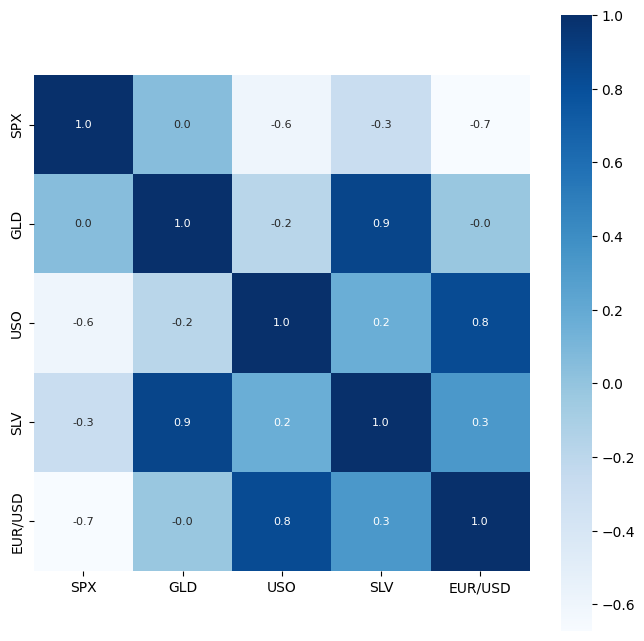

In [14]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True , square =True, fmt = '.1f',annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [15]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-16-84e84c017de2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

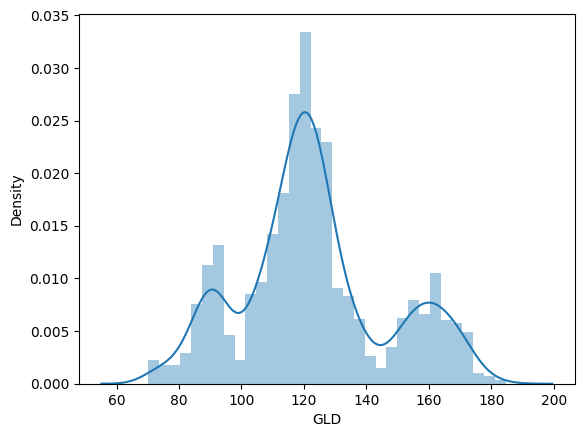

In [16]:
sns.distplot(gold_data['GLD'])

In [17]:
X = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [19]:
model = RandomForestRegressor()

In [20]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [21]:
test_data_prediction = model.predict(X_test)

In [22]:
test_data_prediction

array([168.49699908,  82.26369971, 115.89759997, 127.72620098,
       121.14420104, 154.76279802, 150.31249797, 126.15900056,
       117.28229889, 126.06010016, 116.62500122, 171.12060069,
       141.12159887, 167.82799777, 115.25479976, 118.04440063,
       138.98390306, 170.39460151, 159.33810222, 160.09750018,
       155.02580011, 125.25700018, 177.28509927, 157.64170366,
       125.15480042,  93.7905999 ,  77.57650007, 120.44110009,
       119.17419982, 167.48289945,  88.1444007 , 125.23850003,
        91.17780103, 117.77039997, 121.1148988 , 136.59210071,
       115.47040124, 114.93000051, 148.05529936, 107.44520091,
       104.67120259,  87.28889787, 126.41960063, 117.89159993,
       154.38359928, 119.69599997, 108.38909987, 108.22189828,
        93.21160043, 127.26559743,  75.44400026, 113.69629949,
       121.11600021, 111.05529945, 118.81629894, 120.93379909,
       159.50910039, 167.5874014 , 147.13899668,  85.80599842,
        94.09950041,  86.78469877,  90.48380026, 118.87

In [24]:
error_score = metrics.r2_score(y_test,test_data_prediction)

In [25]:
error_score

0.9899188238753305

In [26]:
Y_test = list(y_test)

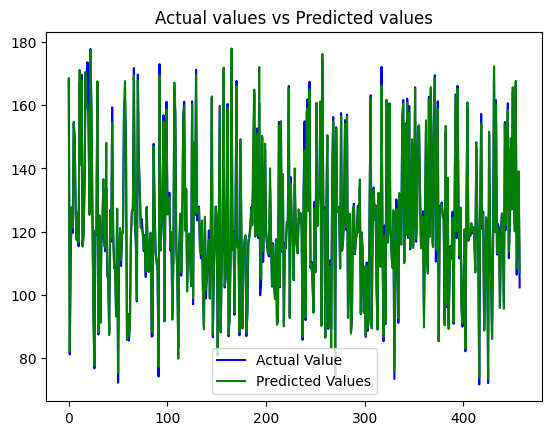

In [28]:
plt.plot(Y_test, color = 'blue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted Values')
plt.title('Actual values vs Predicted values')
plt.legend()
plt.show()